# 식

## 선형회귀

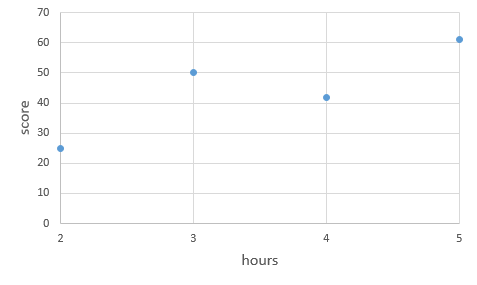

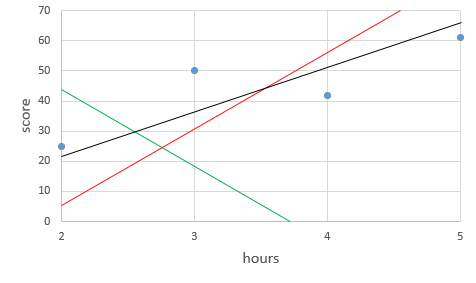

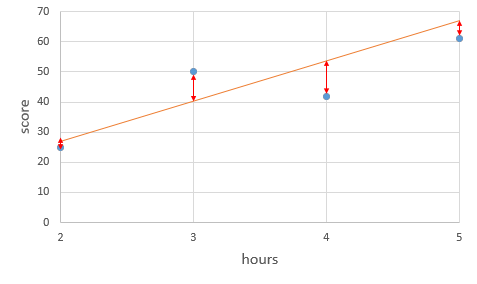

- 점들이 주어져 있을 때 선형적인 관계식을 얻음 -> y=Wx+b

- 새로운 x 값의 결과 값 얻을 수 있음

- 적절한 W(기울기), b(절편) 값 판단 => 비용함수(오차함수)

## 비용함수

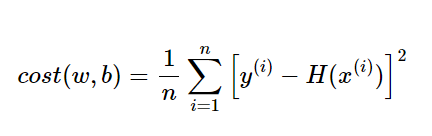

-  y값과 예측값의 차이의 제곱
- 비용함수를 최소화하는 것이 목표

## 경사하강법

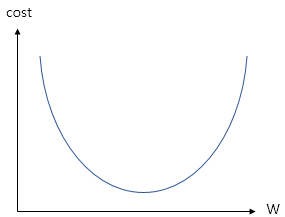

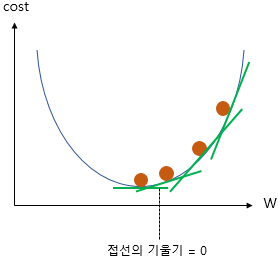

- 이차함수
- 비용이 최소화 하는 방향으로 기울기 이동
    - 기울기 음수(왼쪽) -> 오른쪽으로 이동(+)
    - 기울기 양수(오른쪽) -> 왼쪽으로 이동(+)
    => 경사하강법

## 가중치, 편향 업데이트

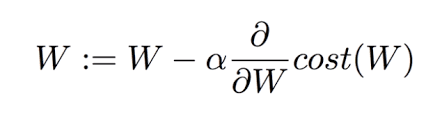

- 각각 W,b에 대해 편미분
- 학습 초반에 기울기 값의 급격한 변화 조절 -> learninh rate
- 업데이트 하는 횟수 = epoch

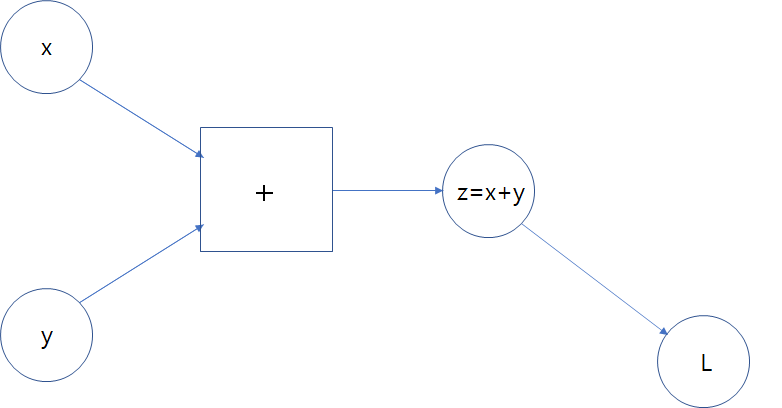

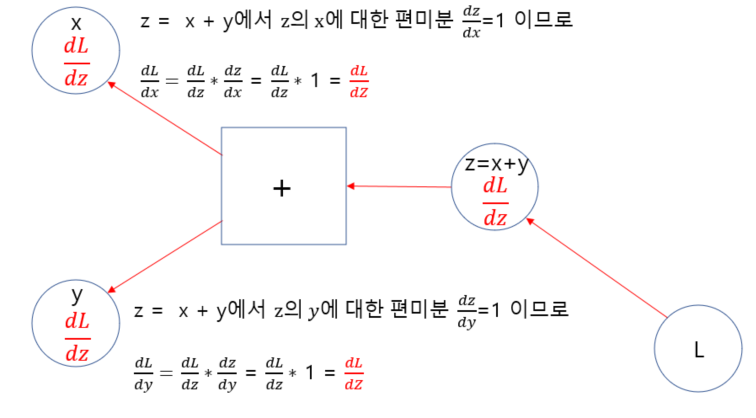

- "연쇄 법칙"에 의해 local gradient -> global goradient
- 순전파할 때 local gredient 구할 수 있음

## 활성화함수

### 시그모이드 함수

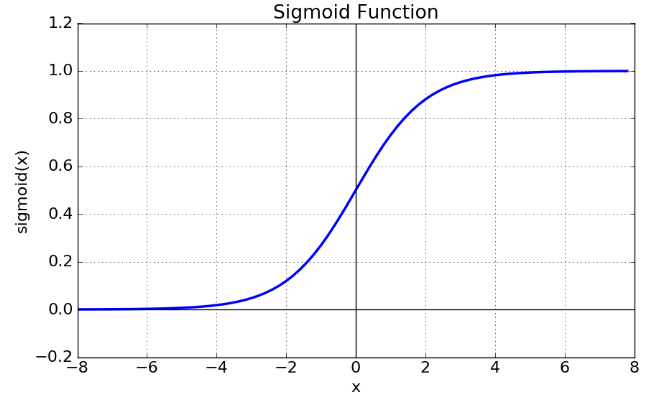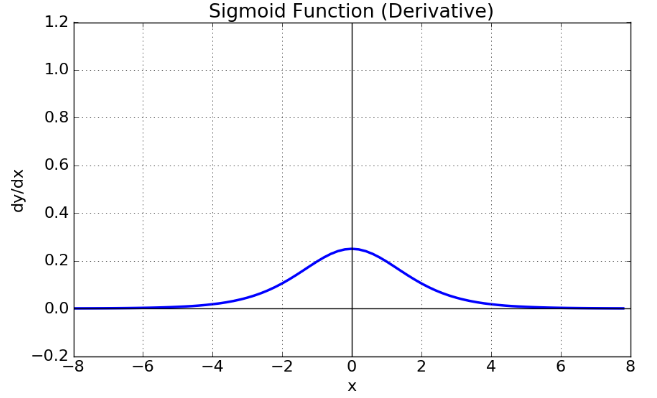

- 미분 값이 너무 작아 역전파시 곱할때 미분값이 너무 작아짐 =>기울기 소멸

### 렐루 함수

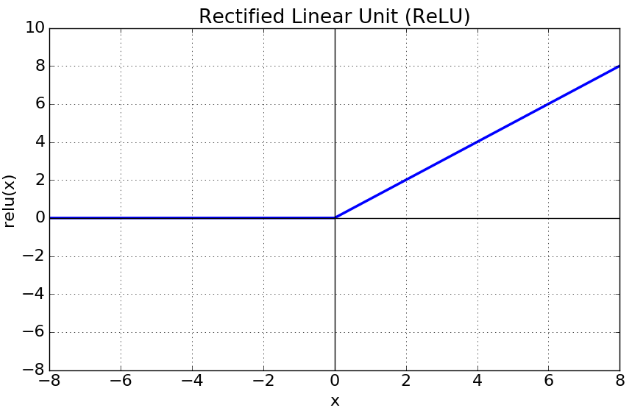

In [ ]:
- x가 양수이면 미분값 1/ 음수이면 함수값 0, 미분값 0
- x가 음수일때 값이 사라질 수 있음 => 리키렐루 함수

# 코드

## 경사하강법 구현

pip install --upgrade pip

In [27]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

### 변수 선언

In [30]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

In [31]:
print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [32]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


### 가중치와 편향의 초기화

In [33]:
# 가중치 0으로 초기화, 자동미분, 출력
W = torch.zeros(1, requires_grad=True) 
print(W) 

tensor([0.], requires_grad=True)


In [34]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


가중치 W, b = 0

y = 0*x +0

### 가설 세우기

In [35]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


### 비용함수 선언

In [36]:
cost = torch.mean((hypothesis - y_train) ** 2) 
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


### 경사하강법 구현

In [37]:
optimizer = optim.SGD([W, b], lr=0.01)

In [38]:
# gradient를 0으로 초기화
optimizer.zero_grad() 
# 비용 함수를 미분하여 gradient 계산
cost.backward() 
# W와 b를 업데이트
optimizer.step() 

## 활성화 함수

### 시그모이드 함수

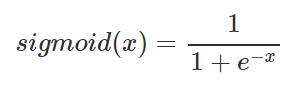

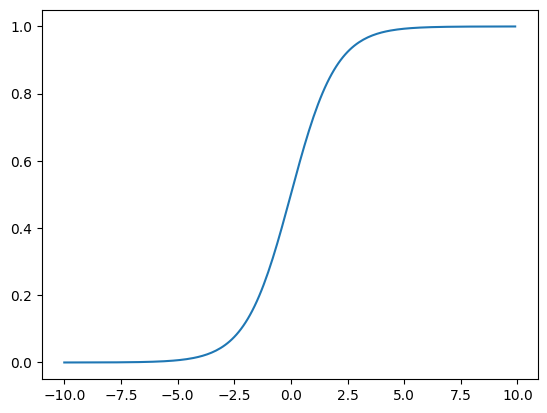

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def binary_step_activate_function(x):
    return 1/(1+np.exp(-x)) # -> 파이토치에서 torch.nn.Sigmoid()
    
x = np.arange(-10, 10, 0.1)
y = binary_step_activate_function(x)

plt.plot(x,y)
plt.show()

### 렐루 함수

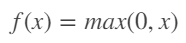

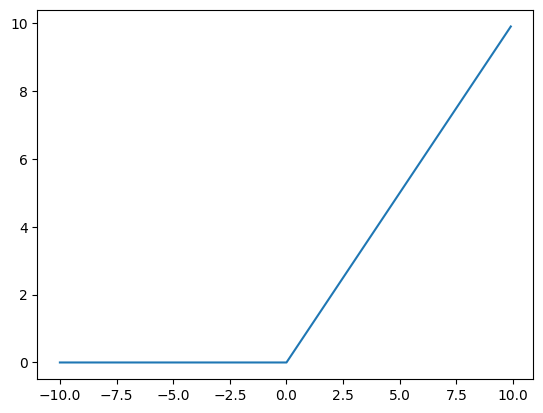

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def binary_step_activate_function(x):
    return np.maximum(0, x) # -> 파이토치에서 torch.nn.ReLU()
    
x = np.arange(-10, 10, 0.1)
y = binary_step_activate_function(x)

plt.plot(x,y)
plt.show()